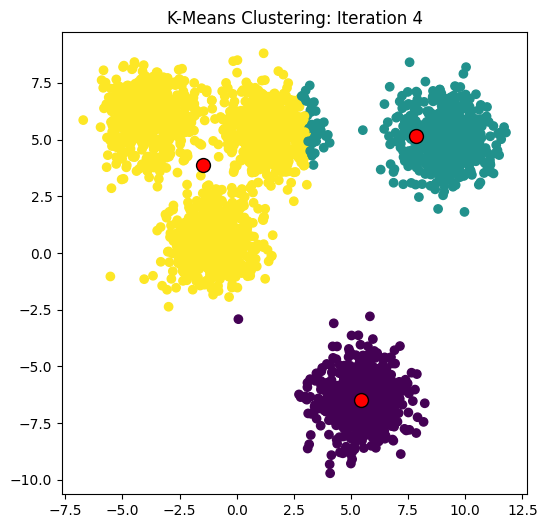

In [138]:
#K-means

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,k_means
from IPython.display import clear_output
import time

n_samples=3000
centers=5
k=3
centroids=x[-k:,:]

x,labels_true=make_blobs(n_samples=n_samples, n_features=2, centers=5 ,random_state=151)



for i in range(5):
    clear_output(wait=True)
    
    clf=KMeans(n_clusters=k, random_state=151, init=centroids ,n_init=1,max_iter=1).fit(x)
    y_pred=clf.predict(x)
    centroids=clf.cluster_centers_
    
    plt.figure(figsize=(6,6))
    plt.scatter(x[:,0],x[:,1],c=y_pred)
    plt.scatter(centroids[:,0],centroids[:,1],c='r',edgecolors='k',s=100)
    plt.title('K-Means Clustering: Iteration {}'.format(i))
    plt.show()
    
    time.sleep(2)
    
    

In [7]:
pd.DataFrame(x).describe()

,0,1
count,1500.000000,1500.000000
mean,1.814132,-2.130219
std,3.396315,4.753821
min,-4.758496,-11.959958
25%,-1.145030,-5.065092
50%,0.712904,-3.348714
75%,5.305976,2.729269
max,8.778726,6.138299


In [10]:
pd.DataFrame(y).value_counts()

0
0    300
1    300
2    300
3    300
4    300
Name: count, dtype: int64

array([3, 1, 2, ..., 2, 4, 0])

In [13]:
x[-3:]

array([[-1.3107889 , -3.84029366],
       [ 7.9052514 ,  3.67536291],
       [-0.89917676, -9.42639594]])

Text(0.5, 1.0, 'Differences')

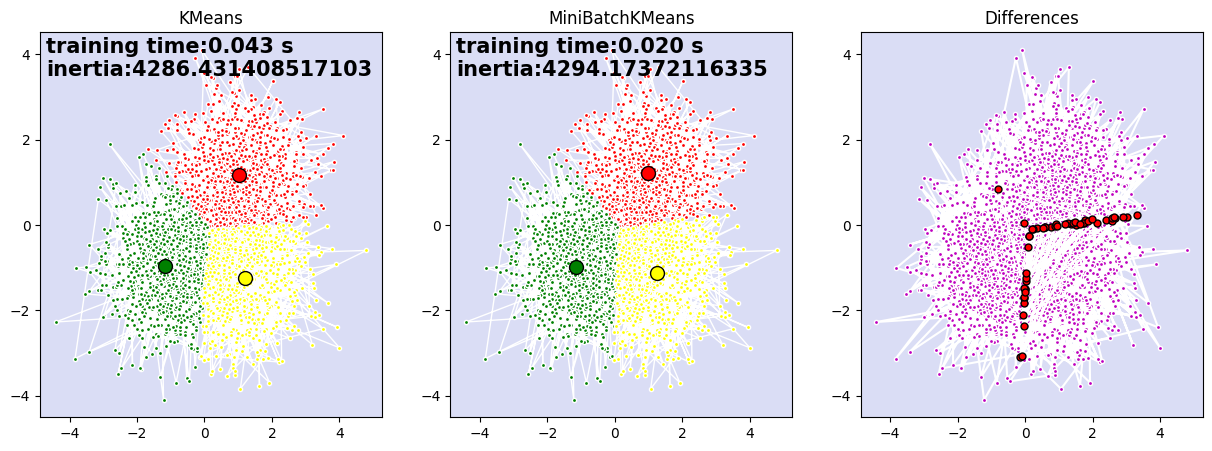

In [407]:
#mini-batch k-means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

import time

#generate samples data

np.random.seed(49)

centers=[[1,1],[1,-1],[-1,-1]]
k=len(centers)

x,labels_true=make_blobs(n_samples=3000,n_features=2,centers=centers,cluster_std=1,random_state=49)

#compute clustering with KMeans

k_means=KMeans(n_clusters=k,init='k-means++',n_init=10,random_state=49)

t0=time.time()
k_means.fit(x)
t_batch=time.time() - t0


#compute clustering with MiniBatchKMeans

mbk=MiniBatchKMeans(n_clusters=k,init='k-means++',n_init=10,max_no_improvement=10,batch_size=1024,random_state=49)

t0=time.time()
mbk.fit(x)
t_mini_batch=time.time() - t0

#plot the result

fig,ax= plt.subplots(1,3,figsize=(15,5))
ax[0].set_facecolor('#daddf5')
ax[1].set_facecolor('#daddf5')
ax[2].set_facecolor('#daddf5')

#We want to have same colors for the same cluster from the KMeans and MiniBatchKMeans algorithm
#Let's pair the cluster centers per the closest one

k_means_cluster_centers=k_means.cluster_centers_
order=pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_cluster_centers=mbk.cluster_centers_[order]

k_means_labels=pairwise_distances_argmin(x,k_means_cluster_centers)
mbk_labels=pairwise_distances_argmin(x,mbk_cluster_centers)

#KMeans

plt.subplot(1,3,1)

for color,k in zip(['red','green','yellow'],np.arange(k_means.n_clusters)):
    
    cluster= k_means_labels==k
    
    ax[0].plot(x[cluster,0],x[cluster,1],'w.-', markerfacecolor=color,markersize=6,lw=1)
    ax[0].plot(k_means_cluster_centers[k,0],k_means_cluster_centers[k,1],'o',
               markerfacecolor=color,markeredgecolor='k',markersize=10)
    
ax[0].set_title('KMeans')
ax[0].text(-4.7,3.5,'training time:{:.3f} s\ninertia:{}'.format(t_batch,k_means.inertia_),fontsize=15,fontweight='bold')

#MiniBatchKMeans

plt.subplot(1,3,2)

for color,k in zip(['red','green','yellow'],np.arange(mbk.n_clusters)):
    
    cluster= mbk_labels==k
    
    ax[1].plot(x[cluster,0],x[cluster,1],'w.-', markerfacecolor=color,markersize=6,lw=1)
    ax[1].plot(mbk_cluster_centers[k,0],mbk_cluster_centers[k,1],'o',
               markerfacecolor=color,markeredgecolor='k',markersize=10)
    
ax[1].set_title('MiniBatchKMeans')
ax[1].text(-4.7,3.5,'training time:{:.3f} s\ninertia:{}'.format(t_mini_batch,mbk.inertia_),fontsize=15,fontweight='bold')

#Initialize the different array to all false

different= mbk_labels==4

plt.subplot(1,3,3)

for i in range(k):
    different += ((k_means_labels==i) != (mbk_labels==i))
    
identic=np.logical_not(different)

ax[2].plot(x[identic,0],x[identic,1],'w.-',markerfacecolor='m',)
ax[2].plot(x[different,0],x[different,1],'w.-',markerfacecolor='#ff0000',markeredgecolor='k',markersize=10)

ax[2].set_title('Differences')

In [208]:
pd.DataFrame(labels_true).describe()

,0
count,3000.000000
mean,1.000000
std,0.816633
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [165]:
pd.DataFrame(labels_true).value_counts()

0
0    1000
1    1000
2    1000
Name: count, dtype: int64

In [260]:
pd.DataFrame(x).describe()

,0,1
count,3000.000000,3000.000000
mean,0.326789,-0.319359
std,1.372567,1.369427
min,-4.413942,-4.091832
25%,-0.658261,-1.339877
50%,0.437805,-0.421018
75%,1.320482,0.638390
max,4.802603,4.108142


In [146]:
k_means_cluster_centers

array([[ 1.20192245, -1.23110157],
       [ 1.01986176,  1.17286283],
       [-1.1593098 , -0.96394662]])

In [147]:
mbk_cluster_centers

array([[ 0.60727287, -1.5780301 ],
       [ 1.23717445,  0.87187136],
       [-1.29392688, -0.58400088]])

In [158]:
k_means_labels.shape

(3000,)

In [159]:
mbk_labels.shape

(3000,)

In [193]:
ax

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

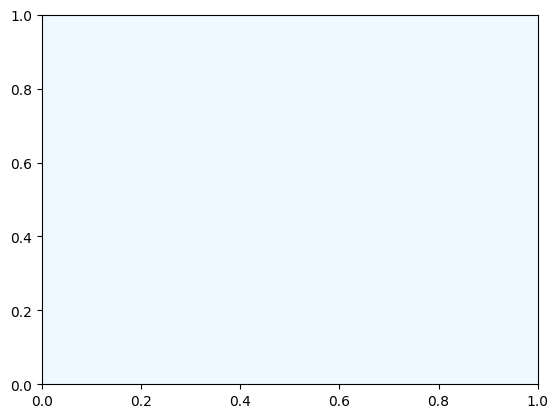

In [202]:
plt.axes().set_facecolor('aliceblue')

In [259]:
pd.DataFrame(k_means_labels).value_counts()

0
2    1032
1    1022
0     946
Name: count, dtype: int64

In [285]:
np.arange(k_means.n_clusters)

array([0, 1, 2])

In [335]:
different.shape

(3000,)

In [358]:
pd.DataFrame(((k_means_labels==0) != (mbk_labels==0))).value_counts()

0    
True     2065
False     935
Name: count, dtype: int64

In [359]:
pd.DataFrame(different).value_counts()

0    
True     2996
False       4
Name: count, dtype: int64

In [362]:
pd.DataFrame(identic).value_counts()

0    
False    2996
True        4
Name: count, dtype: int64

In [394]:
k_means.labels_

array([1, 2, 0, ..., 0, 1, 2], dtype=int32)

In [395]:
order

array([2, 0, 1])

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis)')

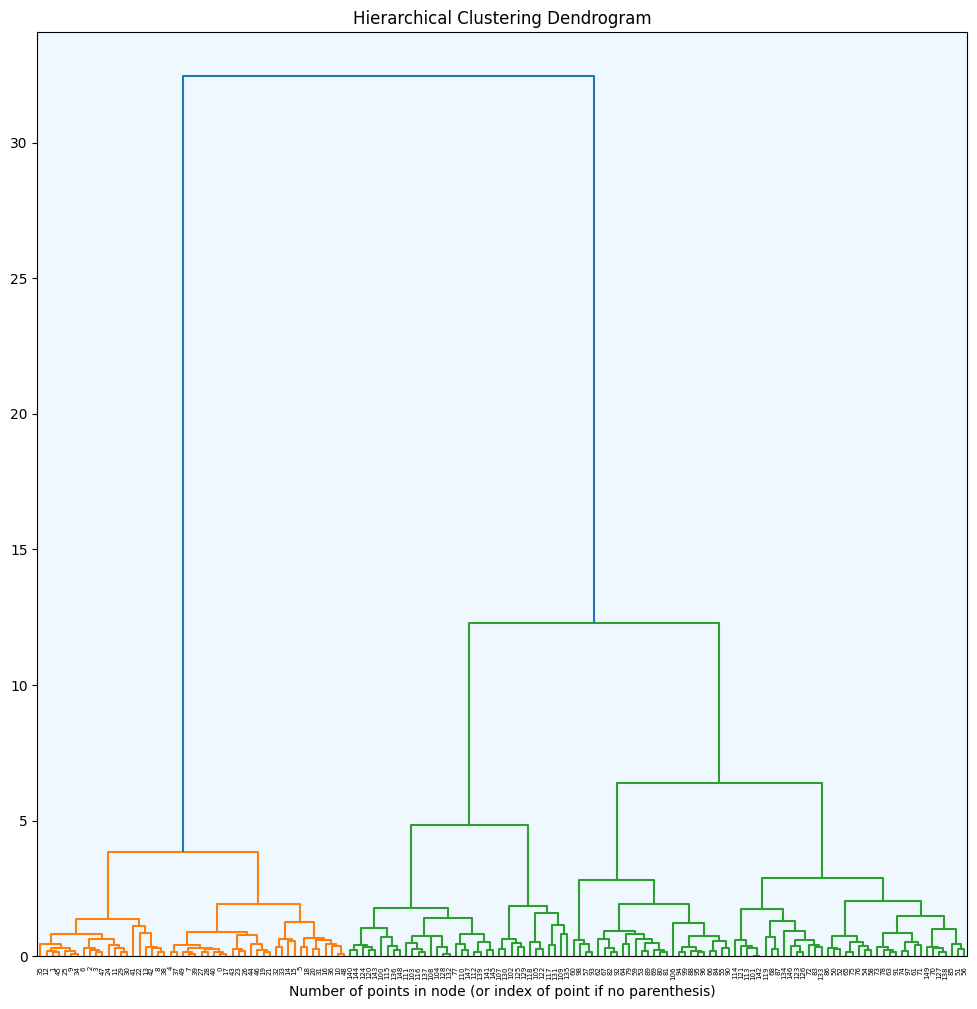

In [477]:
#Connectivity Model Clustering
#Hierarchical Clustering

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,fcluster

def plot_denrogram(model,**kwargs):
    
    #create linkage matrix and then plot the dendrogram
    #create the counts of sample under each node
    
    counts=np.zeros(model.children_.shape[0])
    n_samples=len(model.labels_) #150
    
    for i,merge in enumerate(model.children_):
        current_count=0
        
        for children_idx in merge:
                
            if children_idx < n_samples:
                current_count += 1 #leaf node
            else:
                current_count += counts[children_idx - n_samples]
        
        counts[i]=current_count
        
    linkage_matrix=np.column_stack([model.children_, model.distances_, counts])#.astype(float)
    
    #plot the corresponding dendrogram
    
    dendrogram(linkage_matrix,**kwargs)
    #return linkage_matrix

iris=load_iris()
x=iris.data

#setting distance_threshold=0 ensures we compute the full tree
model=AgglomerativeClustering(distance_threshold=0,n_clusters=None).fit(x)

plt.figure(1,figsize=(12,12))
plt.axes().set_facecolor('aliceblue')

#plot the top three levels of the dendrogram
linkage_matrix=plot_denrogram(model,truncate_mode='level',p=20)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
#plt.grid()

In [421]:
model.children_.shape

(149, 2)

In [423]:
model.n_clusters_

150

In [425]:
model.n_connected_components_

1

In [433]:
model.n_leaves_

150

In [435]:
model.distances_.shape

(149,)

In [430]:
np.sort(model.labels_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [432]:
list(enumerate(model.children_))

[(0, array([101, 142])),
 (1, array([ 7, 39])),
 (2, array([ 0, 17])),
 (3, array([ 9, 34])),
 (4, array([128, 132])),
 (5, array([10, 48])),
 (6, array([ 4, 37])),
 (7, array([19, 21])),
 (8, array([29, 30])),
 (9, array([57, 93])),
 (10, array([80, 81])),
 (11, array([116, 137])),
 (12, array([ 8, 38])),
 (13, array([ 3, 47])),
 (14, array([27, 28])),
 (15, array([82, 92])),
 (16, array([95, 96])),
 (17, array([127, 138])),
 (18, array([ 1, 45])),
 (19, array([63, 91])),
 (20, array([65, 75])),
 (21, array([ 40, 152])),
 (22, array([123, 126])),
 (23, array([ 49, 151])),
 (24, array([112, 139])),
 (25, array([94, 99])),
 (26, array([ 12, 168])),
 (27, array([ 88, 166])),
 (28, array([66, 84])),
 (29, array([23, 26])),
 (30, array([53, 89])),
 (31, array([74, 97])),
 (32, array([ 25, 153])),
 (33, array([ 46, 157])),
 (34, array([  2, 163])),
 (35, array([110, 147])),
 (36, array([120, 143])),
 (37, array([136, 148])),
 (38, array([ 78, 169])),
 (39, array([ 69, 160])),
 (40, array([5

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis)')

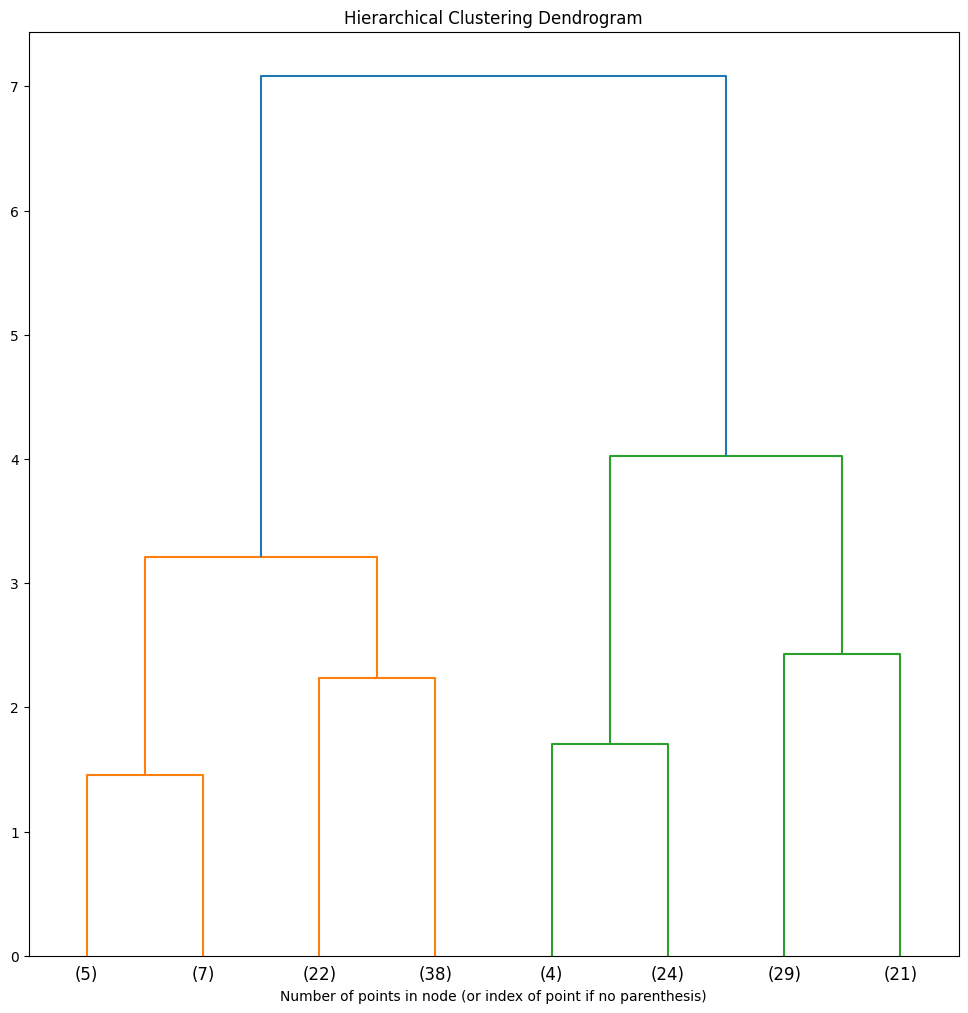

In [506]:
#Connectivity Model Clustering
#Hierarchical Clustering

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

iris=load_iris()
x=iris.data

model=linkage(x,method='complete',)

plt.figure(figsize=(12,12))
dendrogram(model,truncate_mode='level',p=2)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
#plt.grid()

In [507]:
labels=fcluster(model,criterion='distance',t=3)
pd.DataFrame(labels).value_counts().shape

(4,)

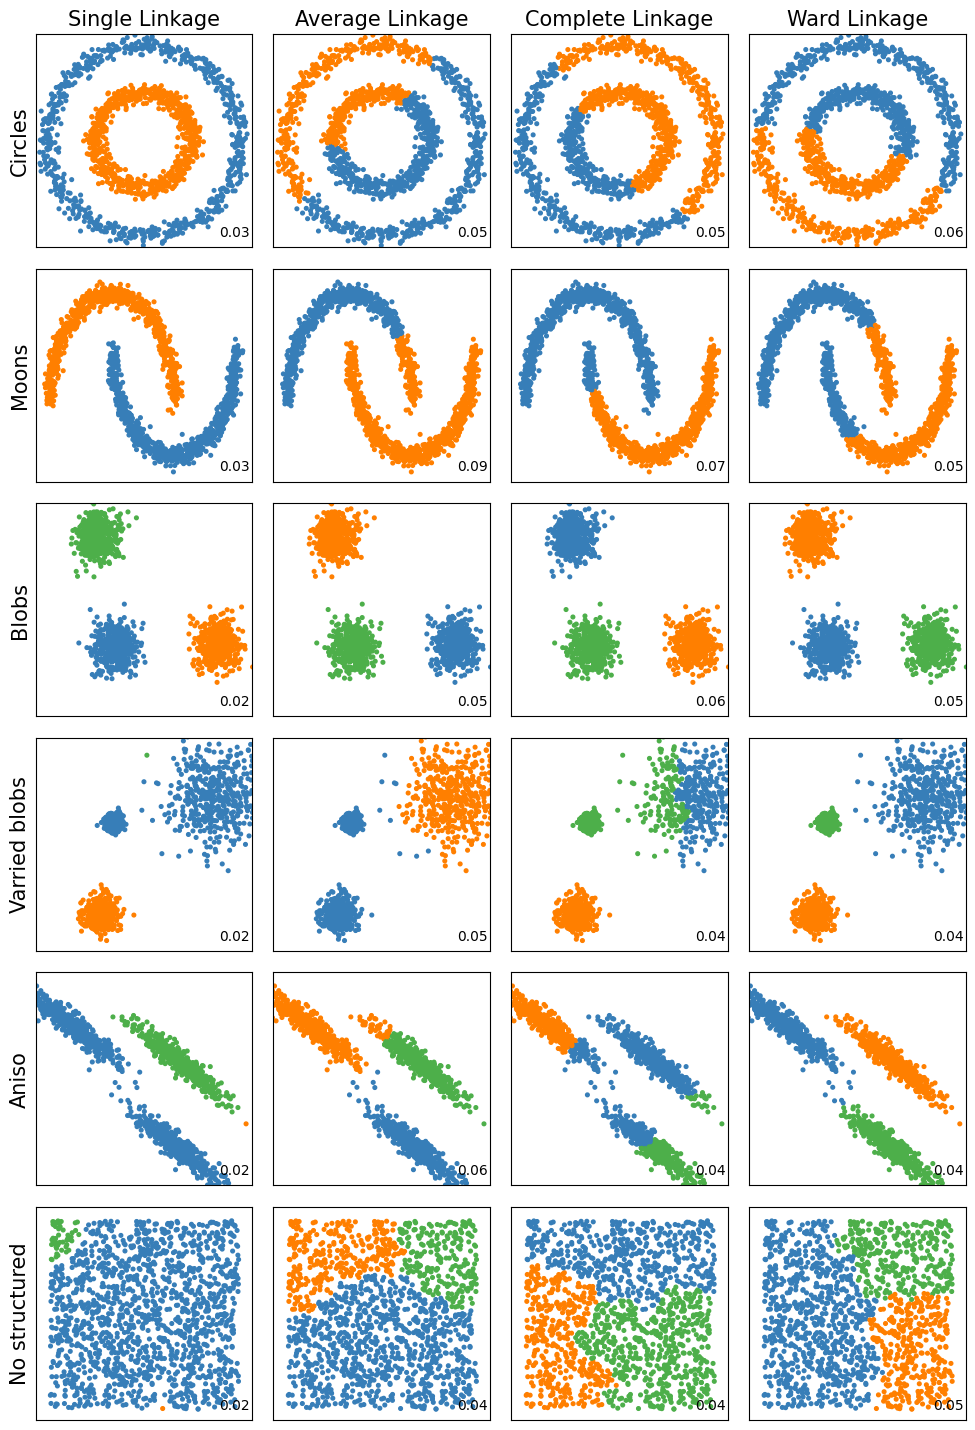

In [937]:
from sklearn import datasets,cluster
from sklearn.preprocessing import StandardScaler
from itertools import cycle,islice

import time,warnings

np.random.seed(47)

circles=datasets.make_circles(n_samples=1500,factor=.5,noise=.05)

moons=datasets.make_moons(n_samples=1500,noise=.05)

blobs=datasets.make_blobs(n_samples=1500,n_features=2,centers=3)

varried_blobs=datasets.make_blobs(n_samples=1500,n_features=2,centers=3,cluster_std=[.5,1,3])

x_aniso,y_aniso=datasets.make_blobs(n_samples=1500,n_features=2,centers=3,cluster_std=.6,random_state=58)
x_aniso=np.dot(x_aniso,[[-.6,.6],[-.2,.5]])
aniso=(x_aniso,y_aniso)

no_structure=np.random.rand(1500,2),None



datasets=[(circles,{'label':'Circles','n_clusters':2}),
          (moons,{'label':'Moons','n_clusters':2}),
          (blobs,{'label':'Blobs','n_clusters':3}),
          (varried_blobs,{'label':'Varried blobs','n_clusters':3}),
          (aniso,{'label':'Aniso','n_clusters':3}),
          (no_structure,{'label':'No structured','n_clusters':3})]

plot_number=1
plt.figure(figsize=(12,18))
plt.subplots_adjust(wspace=.1,hspace=.1)

for i_dataset,(dataset,params) in enumerate(datasets):
    
    x,y=dataset
    x=StandardScaler().fit_transform(x)
    
    single=cluster.AgglomerativeClustering(n_clusters=params['n_clusters'],linkage='single')
    average=cluster.AgglomerativeClustering(n_clusters=params['n_clusters'],linkage='average')
    complete=cluster.AgglomerativeClustering(n_clusters=params['n_clusters'],linkage='complete')
    ward=cluster.AgglomerativeClustering(n_clusters=params['n_clusters'],linkage='ward')
    
    clusters=[(single,'Single Linkage'),(average,'Average Linkage'),
              (complete,'Complete Linkage'),(ward,'Ward Linkage')]
    
    for i_algorithm,(algorithm,name) in enumerate(clusters):
        
        t0=time.time()
        algorithm.fit(x)
        t1=time.time() - t0
        
        labels=algorithm.labels_
        
        plt.subplot(len(datasets),len(clusters),plot_number)
        
        if i_dataset==0:
            plt.title(name,fontsize=15)
            
        if i_algorithm==0:
            plt.ylabel(params['label'],fontsize=15)
        
        colors=np.array(['#377eb8','#ff7f00','#4daf4a'])
        plt.scatter(x[:,0],x[:,1],c=colors[labels],s=7)
        
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.85,.05,'{:.2f}'.format(t1),transform=plt.gca().transAxes,fontsize=10)
        
        plot_number+=1
    

In [837]:
x,y=no_structure
x=StandardScaler().fit_transform(x)

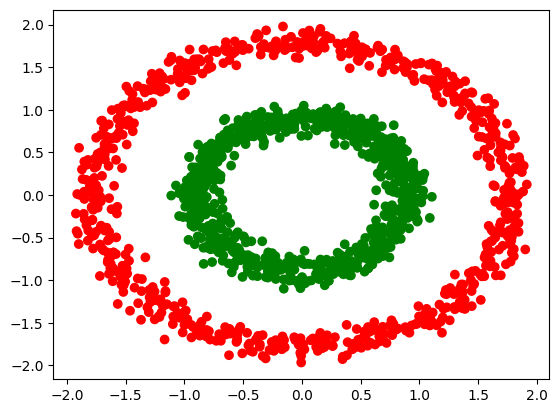

In [903]:
colors=np.array(['red','green','blue'])
plt.scatter(x[:,0],x[:,1],color=colors[labels])

In [1308]:
np.array(['red','green','blue'])

array(['red', 'green', 'blue'], dtype='<U5')

In [1322]:
colors=np.array(['red','green','blue'])
np.unique(label)

array([0, 1, 2, 3, 4, 5])

computing unstructured hierarchical clustering...
elapsed time: 0.07s
number of points: 1500.00

computing structured hierarchical clustering...
elapsed time: 0.15s
number of points: 1500.00


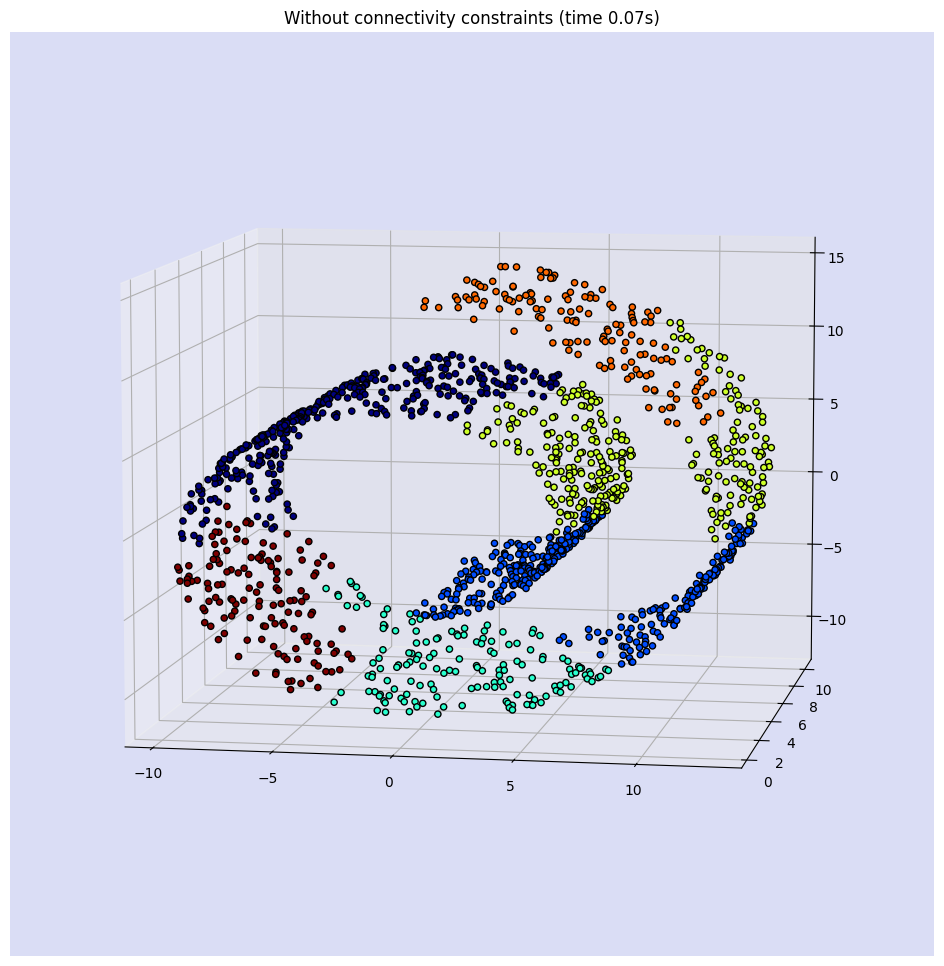

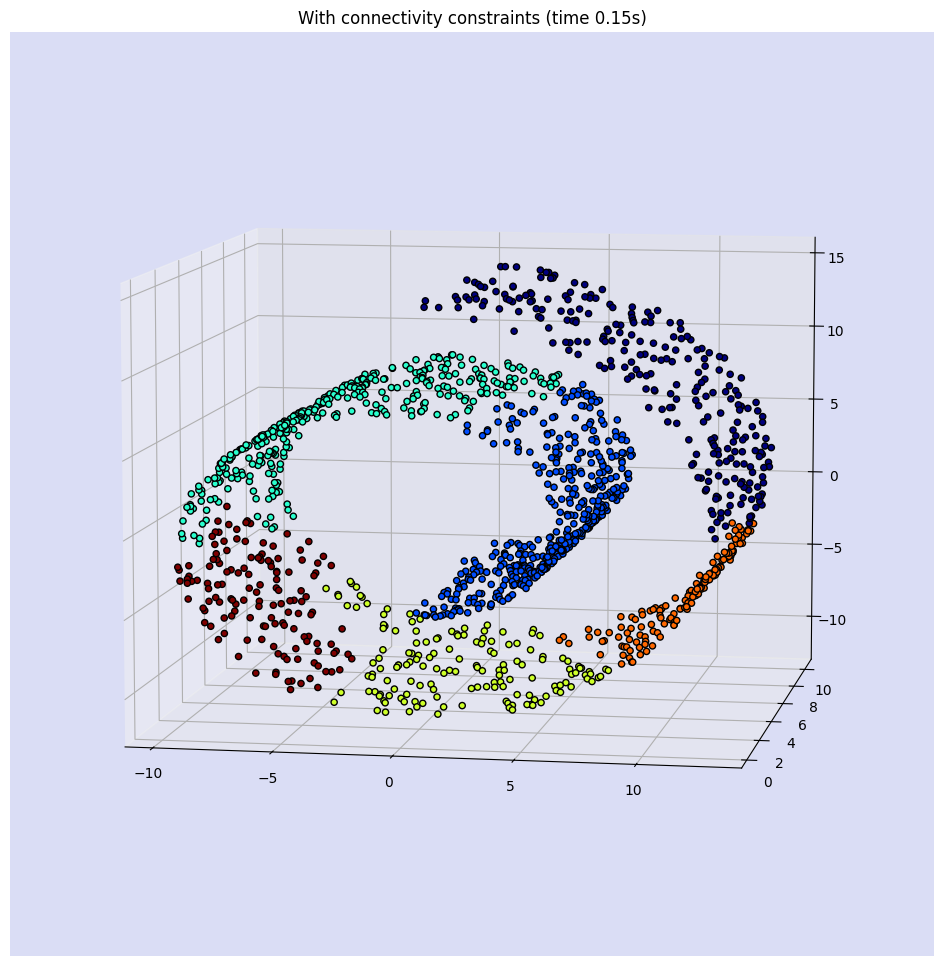

In [1328]:
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import AgglomerativeClustering
import time
from  mpl_toolkits.mplot3d import axes3d as p3

np.random.seed(45)

#generate date (swiss-roll)
x,labels_true=make_swiss_roll(n_samples=1500,noise=0.05,hole=False)

#make the width thinner
x[:,1] *= 0.5

#x[:,[0,2]] *= 10

#compute clustering
print('computing unstructured hierarchical clustering...')
t0=time.time()
ward=AgglomerativeClustering(n_clusters=6,linkage='ward').fit(x)
t1=time.time() - t0
labels=ward.labels_
print('elapsed time: %.2fs'%t1)
print('number of points: %.2f'%ward.labels_.size)

#plot result
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1,projection='3d')
ax.view_init(8,-80,vertical_axis='z')

for i in np.unique(labels):
    ax.scatter(x[labels==i,0],x[labels==i,1],x[labels==i,2],
               color=plt.cm.jet(i * 0.2),
               s=20,edgecolors='k',alpha=1)
    
plt.title('Without connectivity constraints (time %.2fs)' % t1)
ax.set_facecolor('#daddf5')
#################################################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity=kneighbors_graph(x,n_neighbors=7,mode='connectivity',include_self=False,n_jobs=-1)

#compute clustering
print('\ncomputing structured hierarchical clustering...')
t0=time.time()
ward=AgglomerativeClustering(n_clusters=6,linkage='ward',connectivity=connectivity).fit(x)
t1=time.time() - t0
labels=ward.labels_
print('elapsed time: %.2fs'%t1)
print('number of points: %.2f'%ward.labels_.size)

#plot result
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1,projection='3d')
ax.view_init(8,-80,vertical_axis='z')

for i in np.unique(labels):
    ax.scatter(x[labels==i,0],x[labels==i,1],x[labels==i,2],
               color=plt.cm.jet(i * 0.2),
               s=20,edgecolors='k',alpha=1)
    
plt.title('With connectivity constraints (time %.2fs)' % t1)
ax.set_facecolor('#daddf5')

In [1243]:
ward.labels_.size

1500

In [959]:
ward.n_clusters_

6

In [960]:
ward.n_features_in_

3

In [961]:
ward.n_leaves_

1500

In [995]:
np.unique(ward.labels_)

array([0, 1, 2, 3, 4, 5])

In [994]:
np.arange(ward.n_clusters_)


array([0, 1, 2, 3, 4, 5])

In [1042]:
x.shape

(1500, 3)

In [1107]:
np.array(labels_true)

array([ 7.81046038, 13.1115239 ,  8.37945343, ...,  8.99568218,
        7.13403641, 11.95164804])

In [1306]:
connectivity

<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 10500 stored elements in Compressed Sparse Row format>

In [1255]:
plt.cm.jet(np.float32(i) / np.max(labels+ 1))

(1.0, 0.27668845315904156, 0.0, 1.0)

In [1253]:
(np.float32(i) / np.max(labels+ 1))

0.8333333333333334

In [1216]:
np.float32(i)

5.0

In [1217]:
np.max(labels+ 1)

6

In [1307]:
1500*1500


2250000